In [8]:
setwd('/import/DB/workdir/cd40/')

In [10]:
library(Seurat)

In [11]:
my = readRDS('ko3d.mi3d.wt3d.rds')

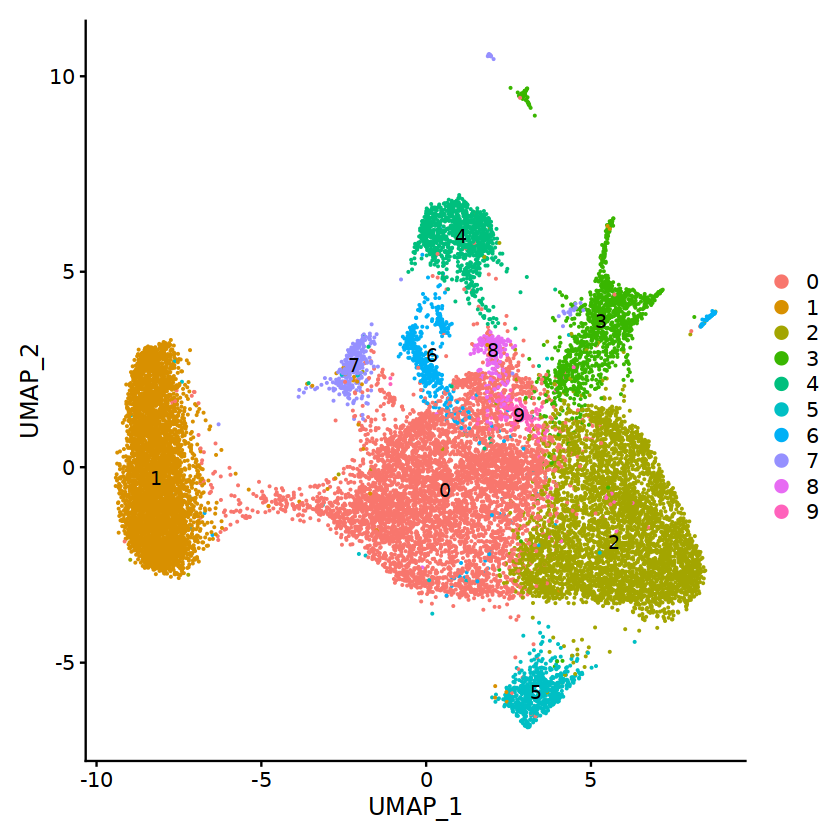

In [13]:
DimPlot(my,label = T)

In [14]:
outdaa = readRDS('/import/DB//workdir/cd40/outdata/outdata.d3.d7.rds')

In [15]:
s1 = merge(outdaa,my)

In [18]:
DefaultAssay(outdaa) = 'integrated'
DefaultAssay(my) = 'integrated'

In [19]:
outdaa <- ScaleData(outdaa, features = rownames(outdaa))
outdaa <- RunPCA(outdaa, npcs = 20, verbose = FALSE)
my <- ScaleData(my, features = rownames(my))
my <- RunPCA(my, npcs = 20, verbose = FALSE)

Centering and scaling data matrix

Centering and scaling data matrix



In [20]:
DefaultAssay(outdaa) = 'integrated'
DefaultAssay(my) = 'integrated'

In [21]:
anchors <- FindTransferAnchors(
  reference = my,
  query = outdaa,
  normalization.method = "LogNormalize",
  reference.reduction = "pca",
  dims = 1:20
)

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2718 anchors

Filtering anchors

	Retained 961 anchors



In [22]:
my <- RunUMAP(my, dims = 1:20,return.model=TRUE)
outdaa <- RunUMAP(outdaa, dims = 1:20,return.model=TRUE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
UMAP will return its model

13:20:39 UMAP embedding parameters a = 0.9922 b = 1.112

13:20:39 Read 19582 rows and found 20 numeric columns

13:20:39 Using Annoy for neighbor search, n_neighbors = 30

13:20:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:20:41 Writing NN index file to temp file /tmp/Rtmpu2h75O/fileba5c2f9b419a

13:20:41 Searching Annoy index using 1 thread, search_k = 3000

13:20:47 Annoy recall = 100%

13:20:48 Commencing smooth kNN distance calibration using 1 thre

In [23]:
pbmc3k <- MapQuery(
  anchorset = anchors,
  query = outdaa,
  reference = my,
  refdata = list(
    celltype.l1 = "celltype",
    celltype.l2 = "seurat_clusters",
    predicted_ADT = "ADT"
  ),
  reference.reduction = "pca", 
  reduction.model = "umap"
)

Warning message:
"`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours."
Warning message:
"Element number 3 provided to refdata does not exist in the provided reference object."
Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l1_ to predictionscorecelltypel1_"
Predicting cell labels

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l2_ to predictionscorecelltypel2_"

Integrating dataset 2 with reference dataset

Finding integration vectors

Integrating data

Computing nearest neighbors

Running UMAP projection

13:21:41 Read 7523 rows

13:21:41 Processing block 1 of 1

13:21:41 Commencing smooth kNN distance calibration using 1 thread
 with target

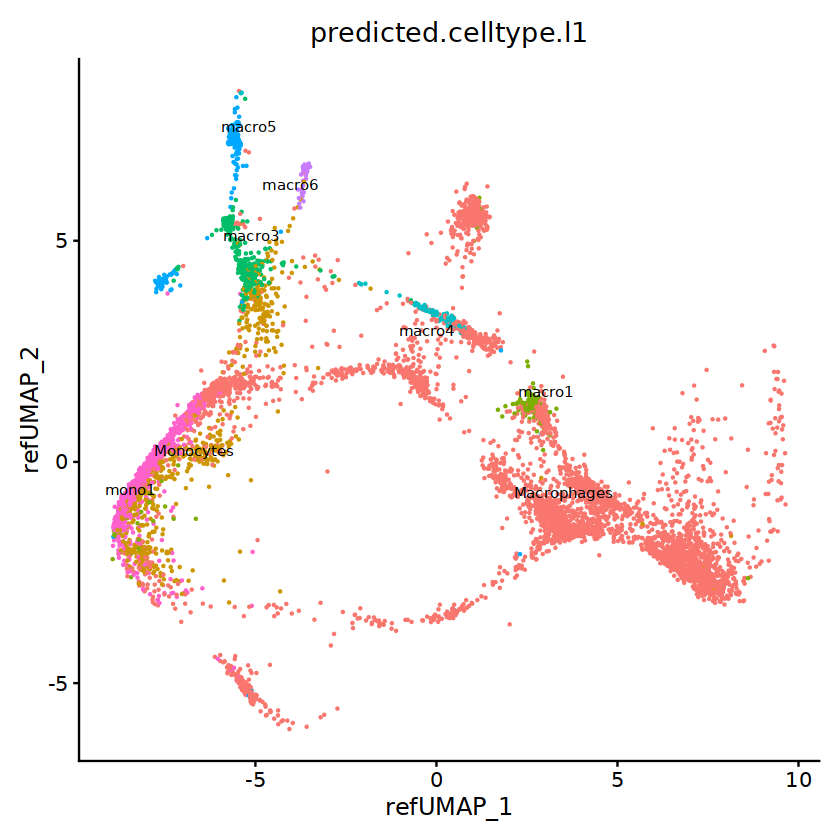

In [24]:
DimPlot(pbmc3k, reduction = "ref.umap", group.by = "predicted.celltype.l1", label = TRUE, label.size = 3, repel = TRUE) + NoLegend()

In [25]:
Idents(pbmc3k) = 'seurat_clusters'

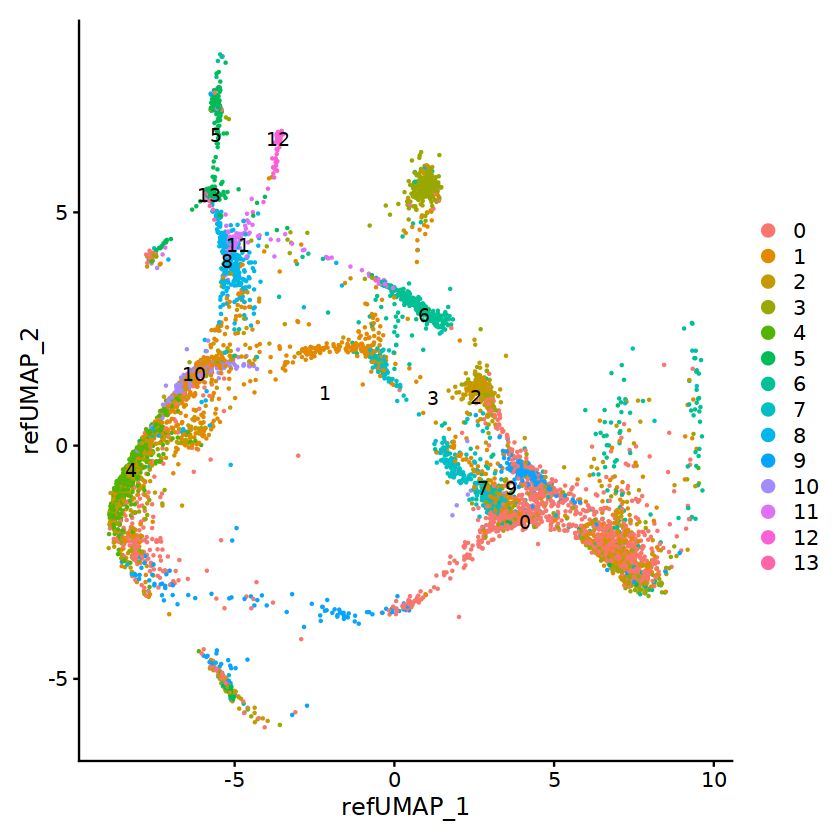

In [26]:
DimPlot(pbmc3k, reduction = "ref.umap",label = T)

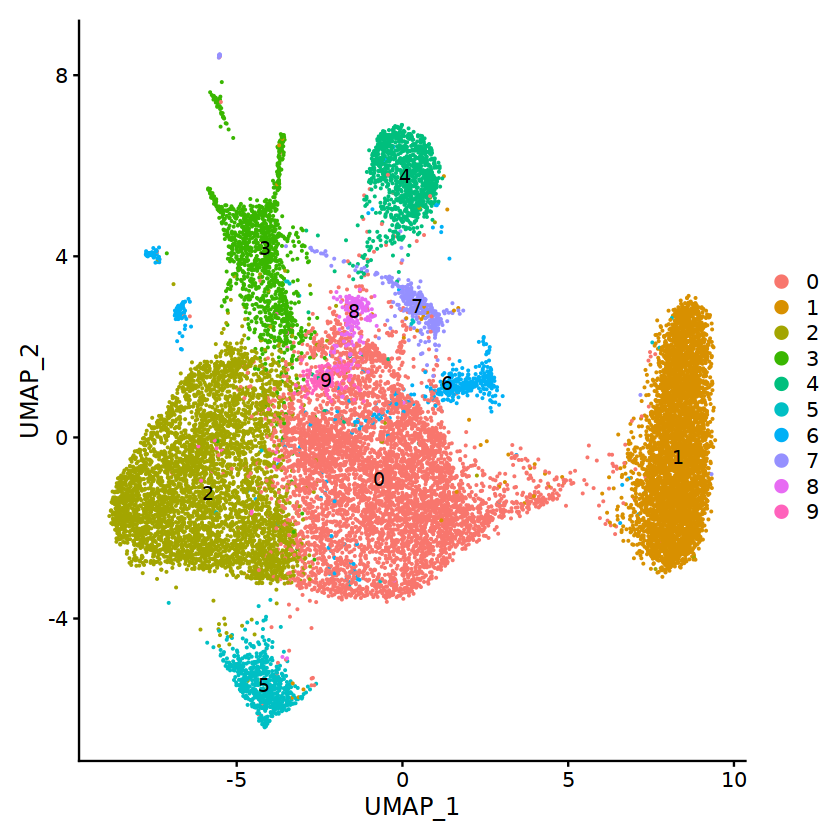

In [27]:
DimPlot(my,label = T)

In [195]:
DefaultAssay(pbmc3k) = 'RNA'


sce.markers <- FindAllMarkers(object = pbmc3k, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



In [ ]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)
library(ggplot2)

In [28]:
DotPlot(pbmc3k, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

ERROR: Error in unique(top5$gene): object 'top5' not found
